In [1]:
!git clone https://github.com/Gokulapps/Pytorch-Model-Training-Base-Repo

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into 'Pytorch-Model-Training-Base-Repo'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 302 (delta 68), reused 152 (delta 68), pack-reused 150
Receiving objects: 100% (302/302), 84.89 KiB | 2.93 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [3]:
%cd /kaggle/working/Pytorch-Model-Training-Base-Repo

/kaggle/working/Pytorch-Model-Training-Base-Repo


In [4]:
%matplotlib inline
import torch 
import torchvision 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as grad
import matplotlib.pyplot as plt
import numpy as np
import argparse
import warnings
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.resnet import ResNet18 
from models.custom_resnet import CustomResnet
from utils import *
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
warnings.filterwarnings("ignore")

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
network = CustomResnet().to(device)
model_summary(network, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [6]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', download=True, train=False, transform=transform)
train_loader = DataLoader(trainset, shuffle=True, batch_size=512, num_workers=2, pin_memory = True)
test_loader = DataLoader(testset, shuffle=False, batch_size=512, num_workers=2, pin_memory = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.38E-02


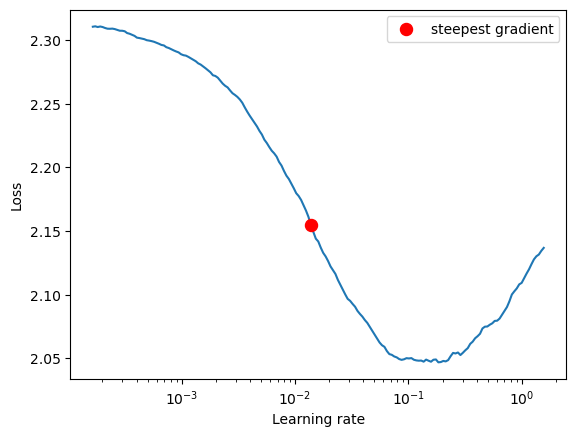

Min Loss = 2.046867783673621, Max LR = 0.18348291233114938


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.0001, momentum=0.9)
find_optimal_lr(network, device, train_loader, optimizer, criterion)
# other params end_lr=0.0001, num_iter=200, step_mode='exp', diverge_th=5

=> Parallelizing Training across Multiple GPU's
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Model Training...
EPOCH: 1


Loss=1.9780855178833008 Batch_id=97 Accuracy=35.19: 100%|██████████| 98/98 [00:15<00:00,  6.47it/s]



Test set: Average loss: 0.0040, Accuracy: 4851/10000 (48.51%)

EPOCH: 2


Loss=1.8030989170074463 Batch_id=97 Accuracy=59.05: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]



Test set: Average loss: 0.0037, Accuracy: 6014/10000 (60.14%)

EPOCH: 3


Loss=1.719360113143921 Batch_id=97 Accuracy=66.25: 100%|██████████| 98/98 [00:14<00:00,  6.60it/s] 



Test set: Average loss: 0.0037, Accuracy: 6080/10000 (60.80%)

EPOCH: 4


Loss=1.7359628677368164 Batch_id=97 Accuracy=72.10: 100%|██████████| 98/98 [00:14<00:00,  6.58it/s]



Test set: Average loss: 0.0036, Accuracy: 6794/10000 (67.94%)

EPOCH: 5


Loss=1.678958535194397 Batch_id=97 Accuracy=74.91: 100%|██████████| 98/98 [00:14<00:00,  6.65it/s] 



Test set: Average loss: 0.0035, Accuracy: 6983/10000 (69.83%)

EPOCH: 6


Loss=1.627015471458435 Batch_id=97 Accuracy=79.66: 100%|██████████| 98/98 [00:15<00:00,  6.41it/s] 



Test set: Average loss: 0.0034, Accuracy: 7398/10000 (73.98%)

EPOCH: 7


Loss=1.644234299659729 Batch_id=97 Accuracy=81.66: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s] 



Test set: Average loss: 0.0034, Accuracy: 7486/10000 (74.86%)

EPOCH: 8


Loss=1.61176335811615 Batch_id=97 Accuracy=83.20: 100%|██████████| 98/98 [00:14<00:00,  6.60it/s]  



Test set: Average loss: 0.0033, Accuracy: 7948/10000 (79.48%)

EPOCH: 9


Loss=1.5988432168960571 Batch_id=97 Accuracy=85.43: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]



Test set: Average loss: 0.0034, Accuracy: 7765/10000 (77.65%)

EPOCH: 10


Loss=1.5948400497436523 Batch_id=97 Accuracy=87.30: 100%|██████████| 98/98 [00:14<00:00,  6.58it/s]



Test set: Average loss: 0.0033, Accuracy: 8037/10000 (80.37%)

EPOCH: 11


Loss=1.578914999961853 Batch_id=97 Accuracy=88.38: 100%|██████████| 98/98 [00:15<00:00,  6.49it/s] 



Test set: Average loss: 0.0033, Accuracy: 8128/10000 (81.28%)

EPOCH: 12


Loss=1.6049261093139648 Batch_id=97 Accuracy=90.20: 100%|██████████| 98/98 [00:14<00:00,  6.57it/s]



Test set: Average loss: 0.0033, Accuracy: 8084/10000 (80.84%)

EPOCH: 13


Loss=1.5766819715499878 Batch_id=97 Accuracy=91.58: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]



Test set: Average loss: 0.0032, Accuracy: 8387/10000 (83.87%)

EPOCH: 14


Loss=1.541965126991272 Batch_id=97 Accuracy=92.76: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s] 



Test set: Average loss: 0.0032, Accuracy: 8426/10000 (84.26%)

EPOCH: 15


Loss=1.5191316604614258 Batch_id=97 Accuracy=93.77: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 0.0032, Accuracy: 8484/10000 (84.84%)

EPOCH: 16


Loss=1.5221896171569824 Batch_id=97 Accuracy=94.96: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s]



Test set: Average loss: 0.0032, Accuracy: 8573/10000 (85.73%)

EPOCH: 17


Loss=1.4988020658493042 Batch_id=97 Accuracy=95.66: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]



Test set: Average loss: 0.0032, Accuracy: 8631/10000 (86.31%)

EPOCH: 18


Loss=1.4935270547866821 Batch_id=97 Accuracy=96.24: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]



Test set: Average loss: 0.0032, Accuracy: 8673/10000 (86.73%)

EPOCH: 19


Loss=1.4943835735321045 Batch_id=97 Accuracy=96.58: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]



Test set: Average loss: 0.0032, Accuracy: 8709/10000 (87.09%)

EPOCH: 20


Loss=1.4788758754730225 Batch_id=97 Accuracy=96.79: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s]



Test set: Average loss: 0.0032, Accuracy: 8714/10000 (87.14%)

EPOCH: 21


Loss=1.4903934001922607 Batch_id=97 Accuracy=96.91: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 0.0032, Accuracy: 8713/10000 (87.13%)

EPOCH: 22


Loss=1.4851747751235962 Batch_id=97 Accuracy=96.98: 100%|██████████| 98/98 [00:14<00:00,  6.57it/s]



Test set: Average loss: 0.0032, Accuracy: 8720/10000 (87.20%)

EPOCH: 23


Loss=1.4858072996139526 Batch_id=97 Accuracy=97.02: 100%|██████████| 98/98 [00:15<00:00,  6.51it/s]



Test set: Average loss: 0.0032, Accuracy: 8722/10000 (87.22%)

EPOCH: 24


Loss=1.479087471961975 Batch_id=97 Accuracy=97.02: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s] 



Test set: Average loss: 0.0032, Accuracy: 8715/10000 (87.15%)

Model Saved
Plotting Graphs


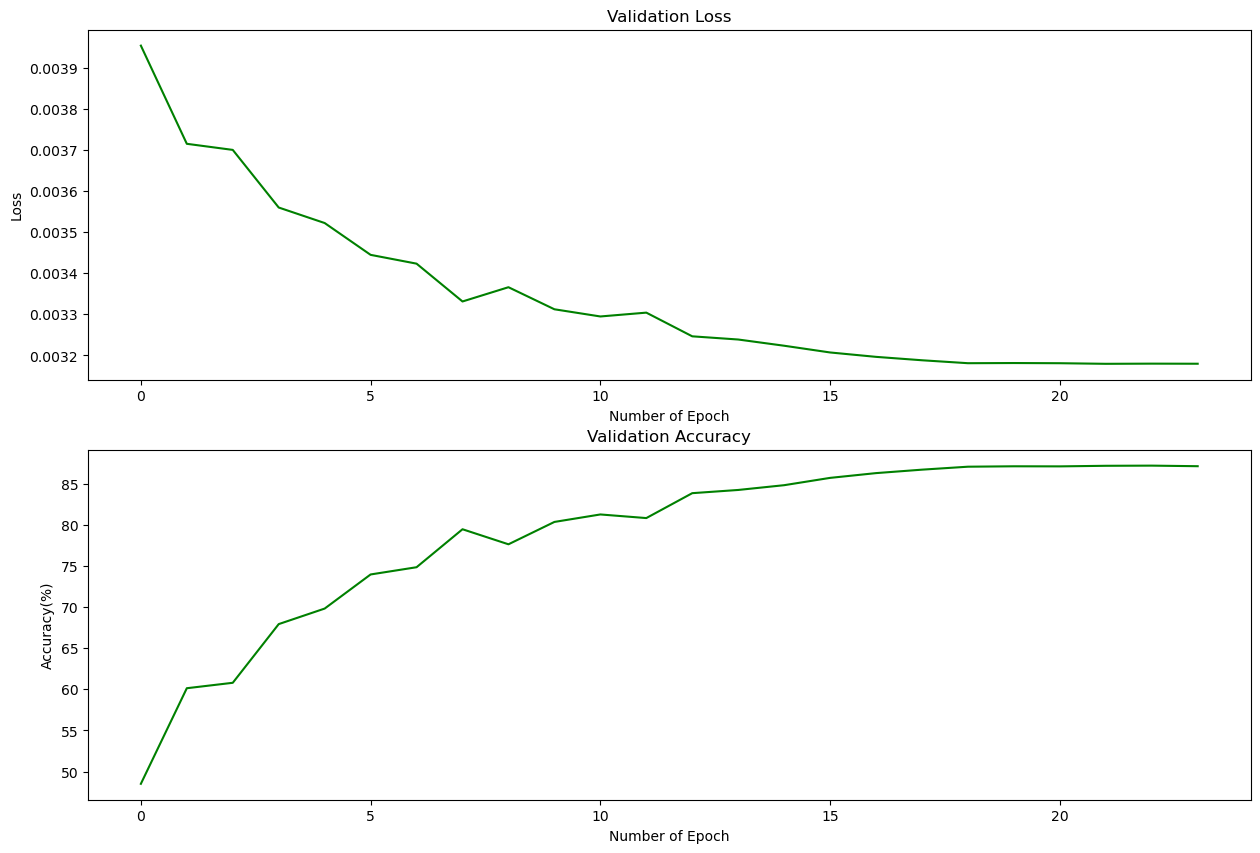

Displaying Sample Images from Dataset
Main File Completed!!!


In [7]:
%matplotlib inline
%run main.py CIFAR10 24 512 0.00138 0.18348291233114938

In [10]:
model = torch.load('./checkpoint/model.pth')

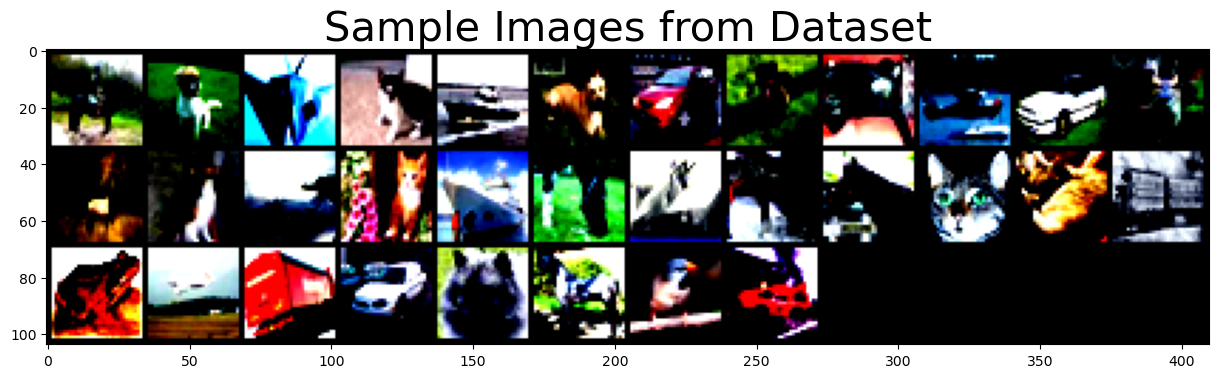

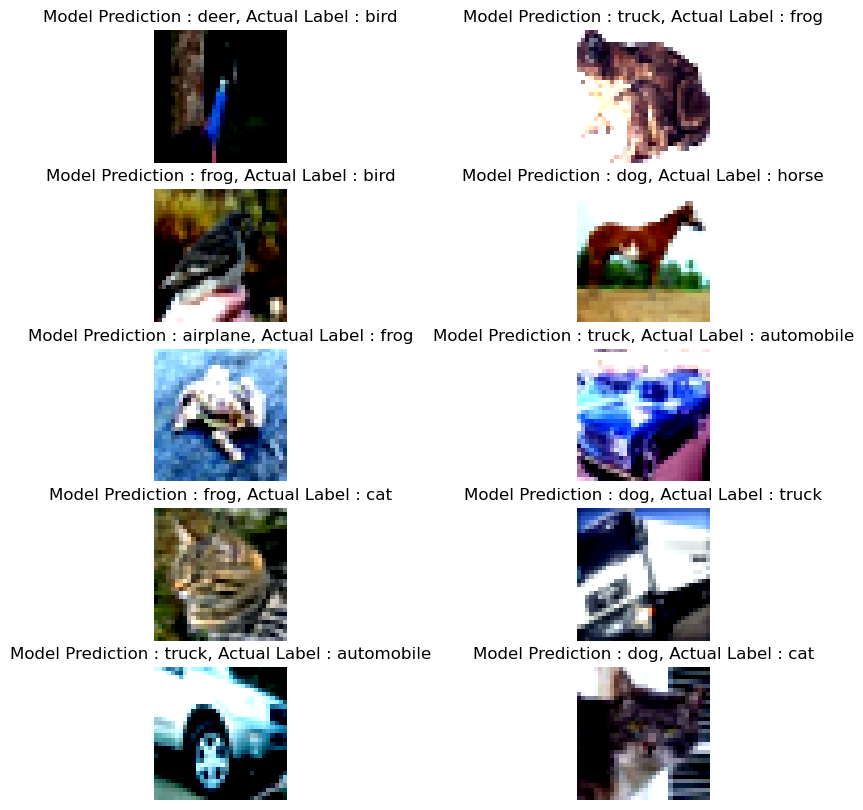

In [12]:
incorrect_predictions = misclassified_images(model, device, test_loader, 10)
plot_misclassified_images(incorrect_predictions, classes, 5, 2, 10, fig_size=(10, 10))

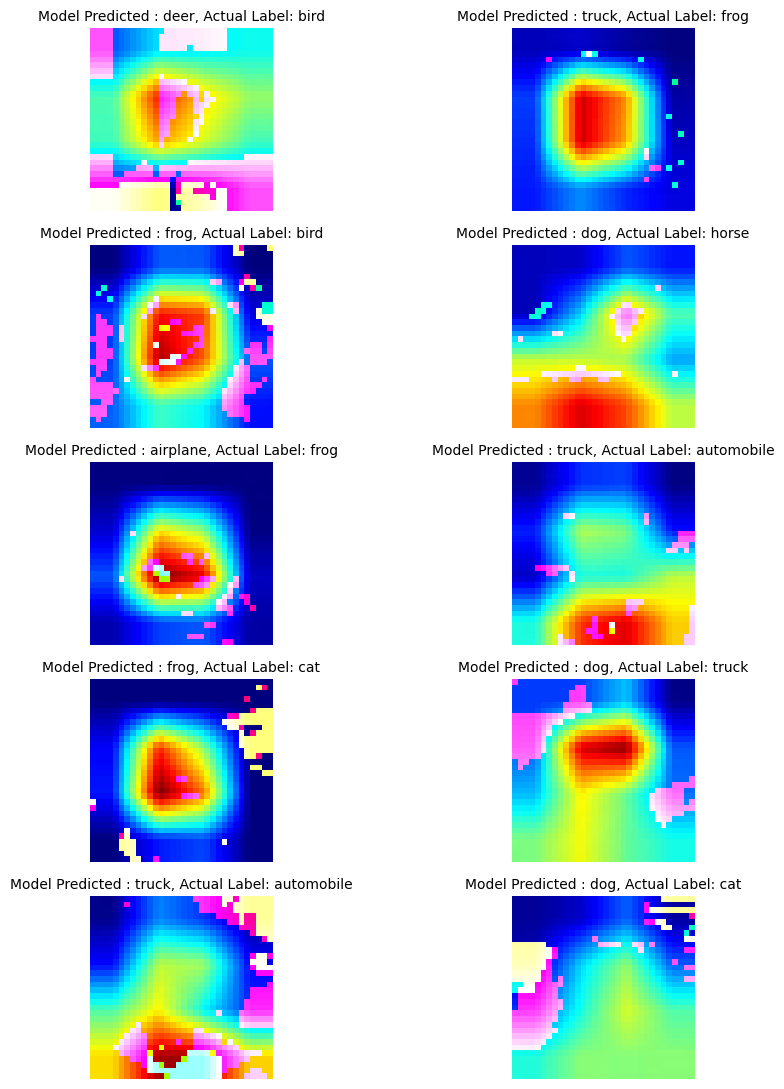

In [13]:
plt.figure(figsize=(11, 11))
for i in range(len(incorrect_predictions)):
    plt.subplot(5, 2, i+1)
    plt.axis('off')
    gradcam_image = Gradcam(model.module, incorrect_predictions[i][0].unsqueeze(dim=0), 'block4', slice(None), device, incorrect_predictions[i][2])
    plt.title(f"Model Predicted : {classes[incorrect_predictions[i][1]]}, Actual Label: {classes[incorrect_predictions[i][2]]}", fontsize=10)
    plt.imshow(gradcam_image.squeeze())
plt.tight_layout()

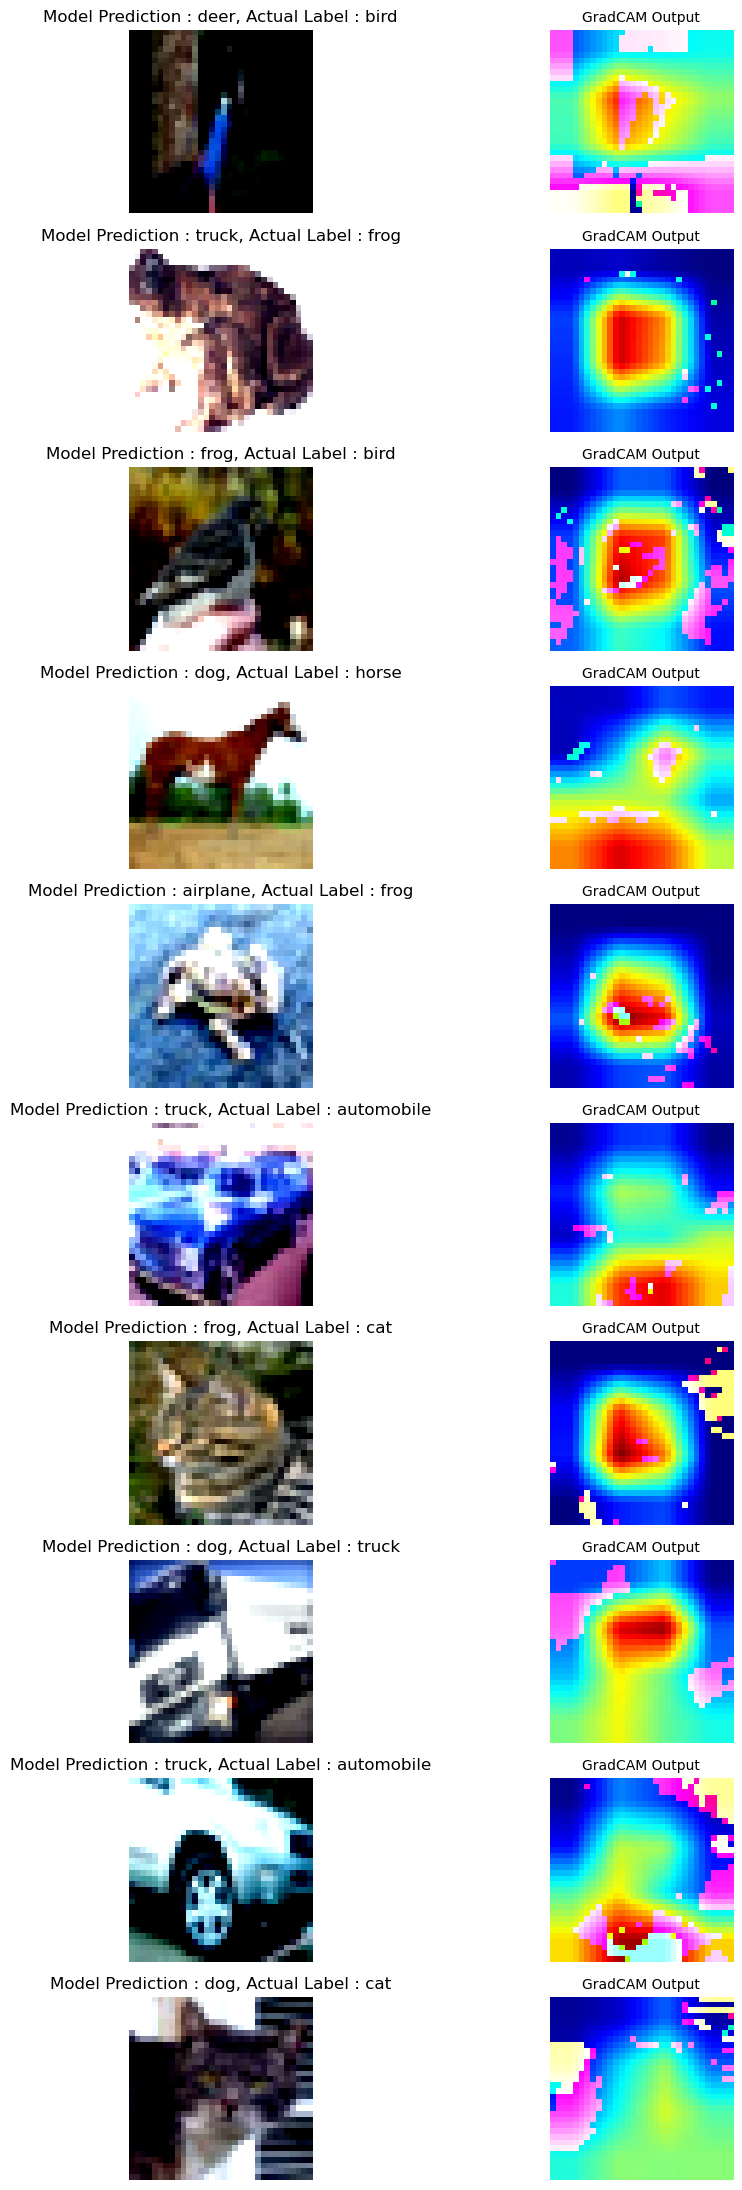

In [14]:
plt.figure(figsize=(11, 22))
for i in range(len(incorrect_predictions)):
    plt.subplot(10, 2, 2*i+1)
    plt.axis('off')
    image = (incorrect_predictions[i][0].to('cpu').numpy() / 2) + 0.5
    npimage = np.transpose(image, (1, 2, 0))
    plt.title(f'Model Prediction : {classes[incorrect_predictions[i][1]]}, Actual Label : {classes[incorrect_predictions[i][2]]}')
    plt.imshow(npimage, cmap='gray_r')
    plt.subplot(10, 2, 2*i+2)
    plt.axis('off')
    gradcam_image = Gradcam(model.module, incorrect_predictions[i][0].unsqueeze(dim=0), 'block4', slice(None), device, incorrect_predictions[i][2])
    plt.title(f"GradCAM Output", fontsize=10)
    plt.imshow(gradcam_image.squeeze())
plt.tight_layout()